1.9087555408477783


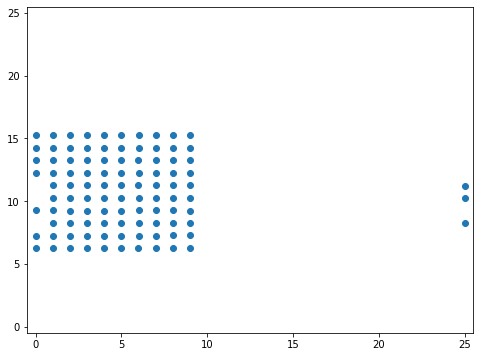

In [23]:
import numpy as np
import random as rand
import pylab as plb
import matplotlib.animation as animation
import time
from scipy.spatial.distance import pdist,squareform
import math
plb.rcParams['figure.figsize'] = 8,6

t11 = time.time()

__epsilon__ = 1.65e-21
__sigma__ = 3.4e-10
__force__ = 4.85e-12
__time__ = 2.17e-12 
__rho__ = 1.046542328e-3

cutoff = 3.
Vmax = 4.
dt = 0.005
L_J_P = lambda r: 4 * ((1/r)**12-(1/r)**6)
L_J_F = lambda r: 48*(1/(r**13)-0.5*(1/(r**7)))
N = 100
__L__ = 25 

dots = np.random.rand(N,4)

dots[:,0:2] *= __L__


#The I.C.


for i in range(10):
    for j in range(10):
        dots[10*i+j,0] = 1.0*i 
        dots[10*i+j,1] = 1.0*j + __L__/4


dots[:,2:] *= Vmax



"""The Cm Velocity is 0 so..."""
CM_V_0(dots,N)

"""Initial Forces"""
## Its Important to run this block of code because the initial forces are of much importance in Verlet Alg.
F_X_0  , F_Y_0 = InterForces(dots,cutoff)


def timestep():
    dots[:,:2] += dots[:,2:]
    cross_left = dots[:,0]<0.
    cross_right = dots[:,0]>__L__
    cross_top = dots[:,1]>__L__
    cross_bot = dots[:,1]<0.

    dots[cross_left|cross_right,2] *=-1
    dots[cross_top|cross_bot,3] *=-1

    dots[cross_left,0] = 0.
    dots[cross_right,0] = __L__

    dots[cross_top,1] = __L__
    dots[cross_bot,1] = 0.
    
    

"""fig , ax = plb.subplots()
line, = ax.plot(dots[:,0],dots[:,1],'b.',ms=16)
def animate(i):
    ActioN(dots,dt,C=10)
    plb.xlim(-0.5,__L__+0.5)
    plb.ylim(-0.5,__L__+0.5)
    line.set_data(dots[:,0],dots[:,1])
    return line,

ani = animation.FuncAnimation(fig,animate,interval=2,frames=300)
"""

ActioN(dots,dt)
plb.scatter(dots[:,0],dots[:,1])
plb.xlim(-0.5,25.5)
plb.ylim(-0.5,25.5)
print(time.time() - t11)

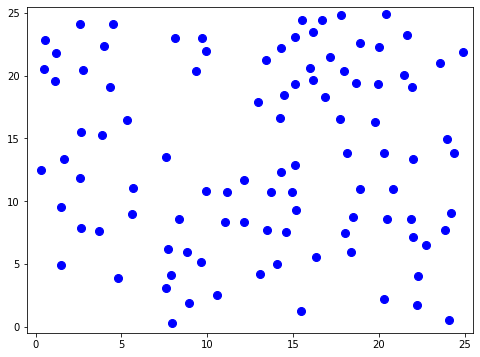

In [82]:
#For Animation Making Using Matplotlib

fig , ax = plb.subplots()
line, = ax.plot(dots[:,0],dots[:,1],'b.',ms=16)
def animate(i):
    ActioN(dots,dt,C=10)
    plb.xlim(-0.5,__L__+0.5)
    plb.ylim(-0.5,__L__+0.5)
    line.set_data(dots[:,0],dots[:,1])
    return line,

ani = animation.FuncAnimation(fig,animate,interval=8,frames=300)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


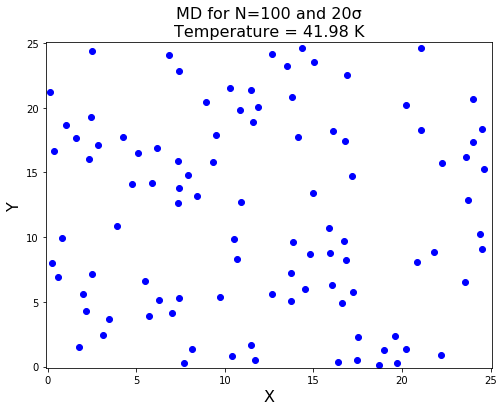

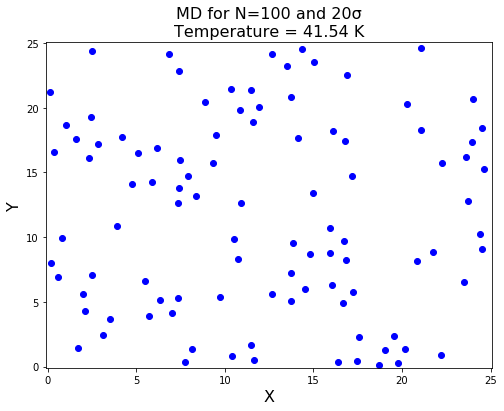

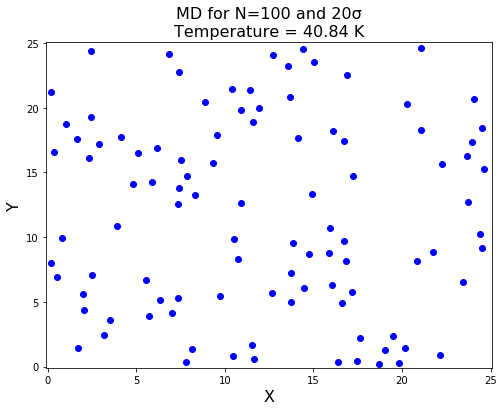

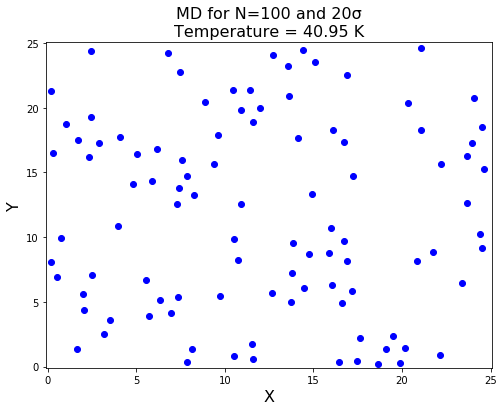

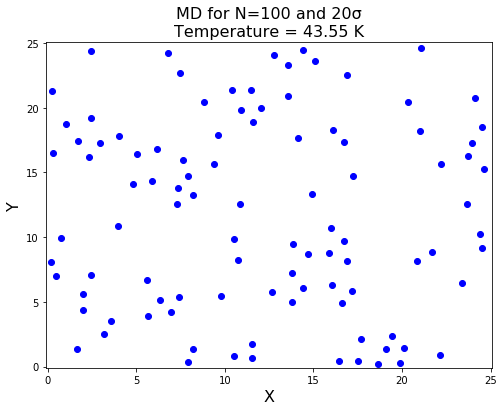

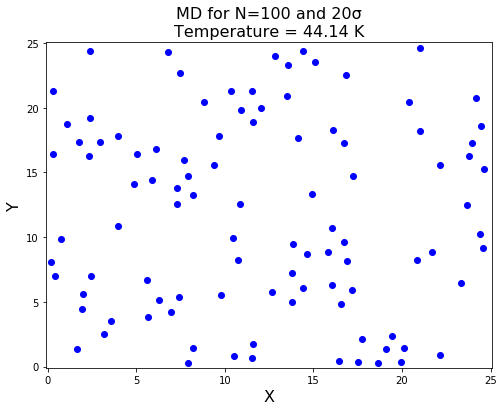

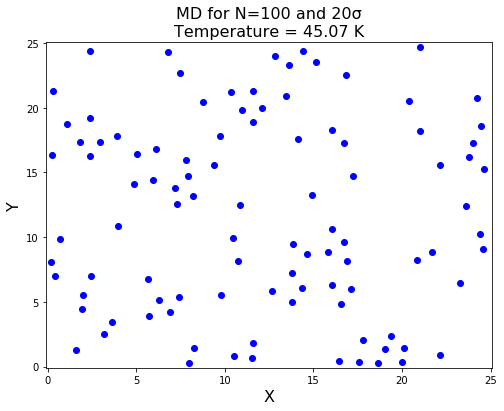

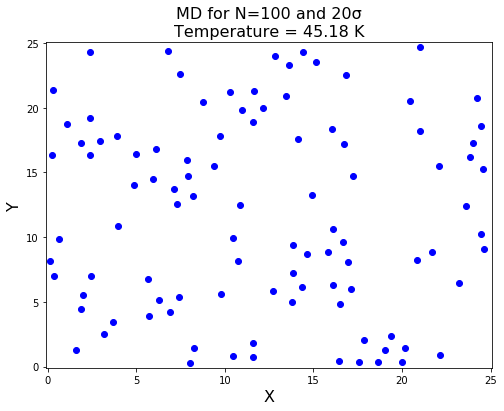

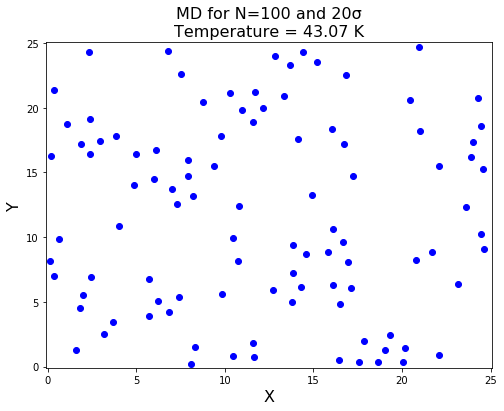

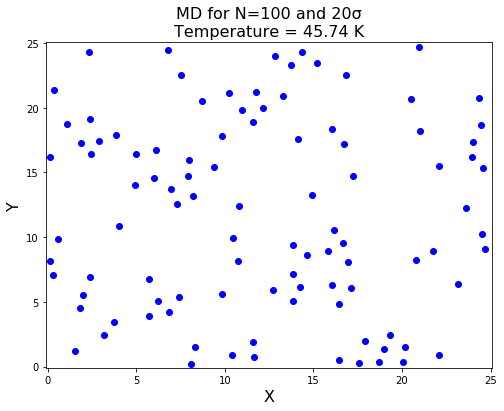

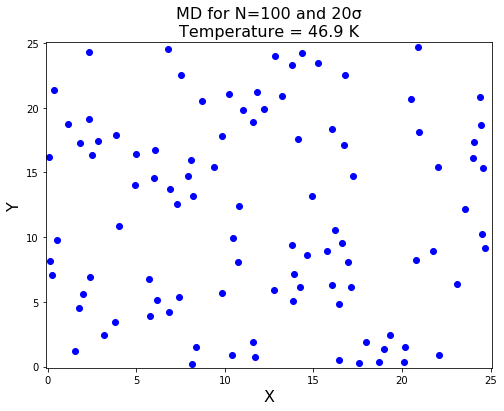

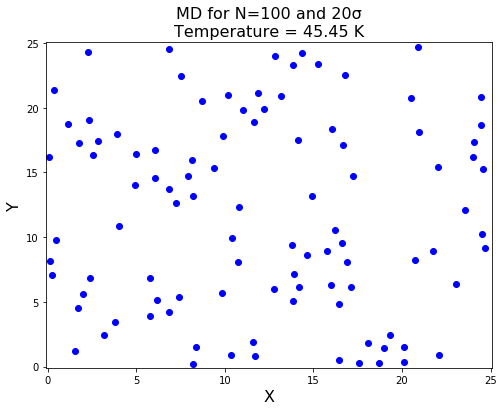

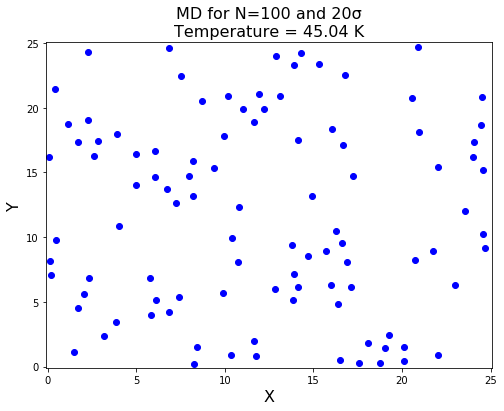

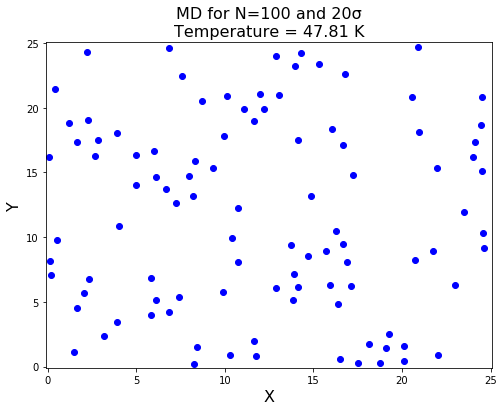

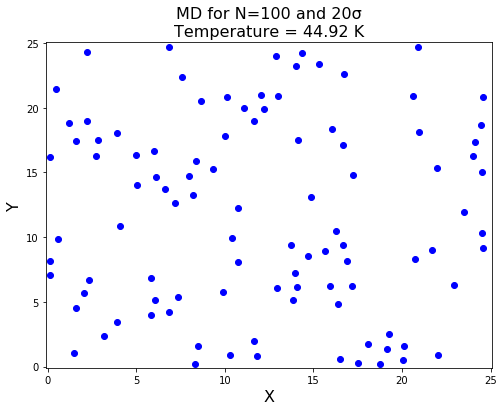

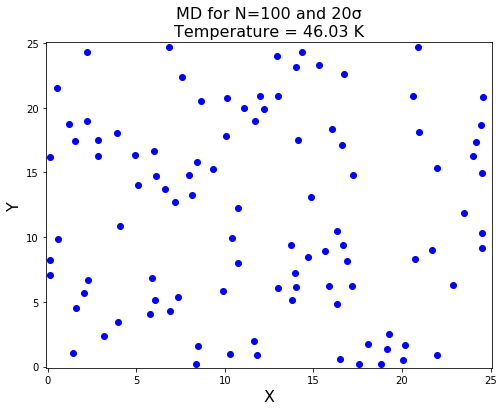

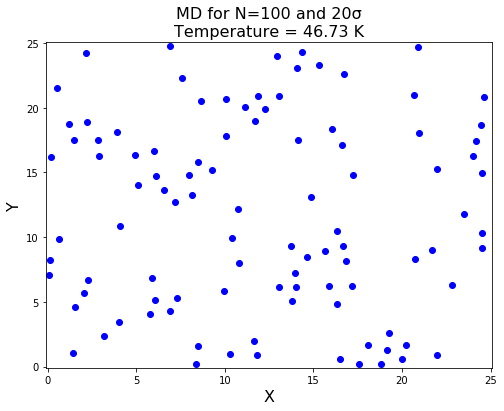

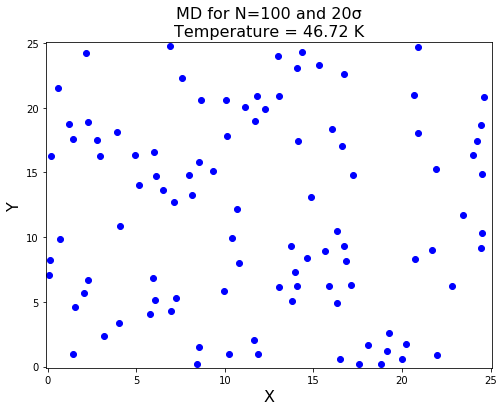

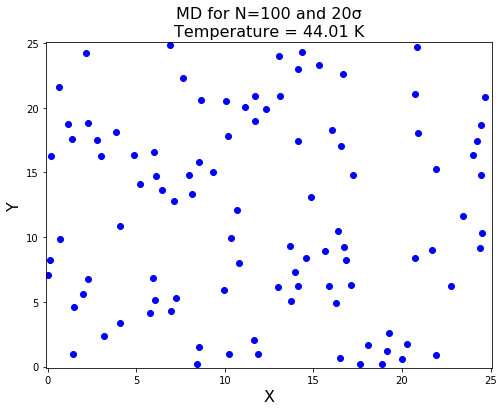

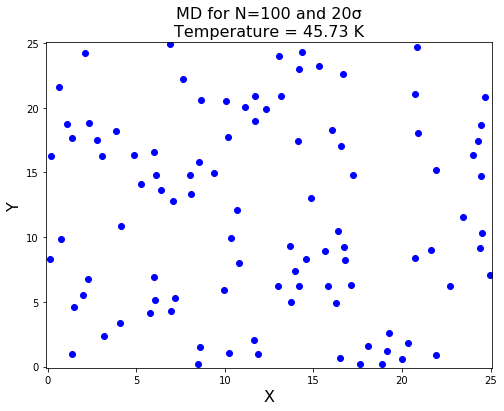

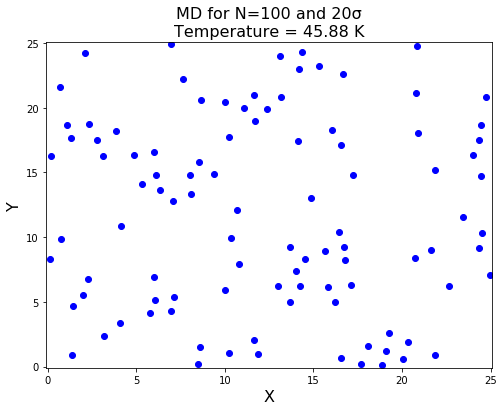

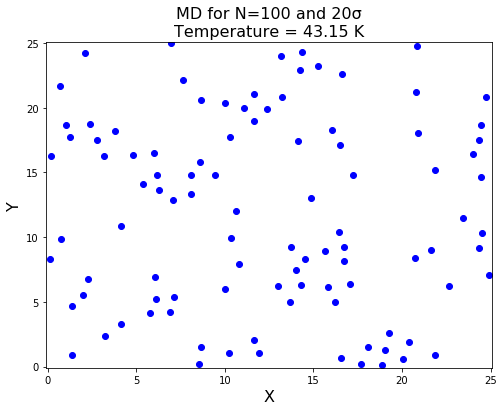

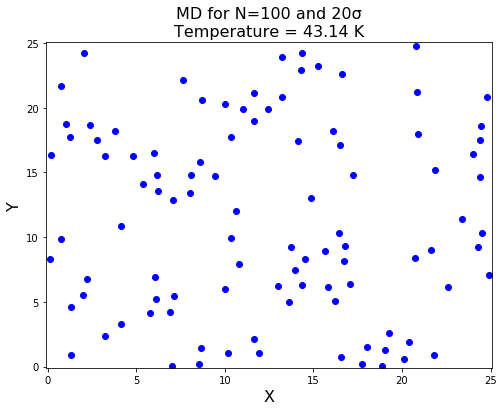

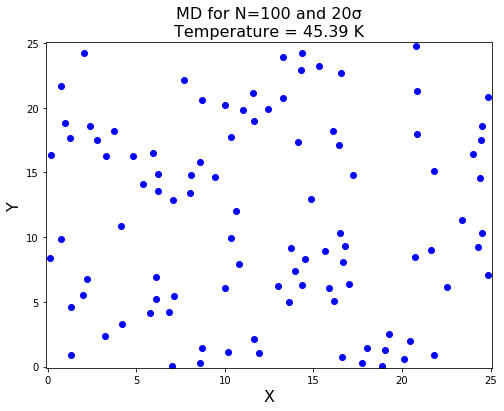

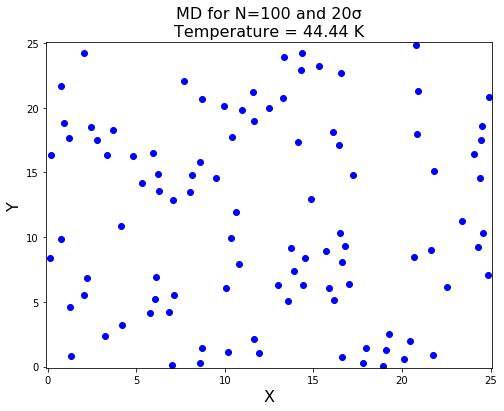

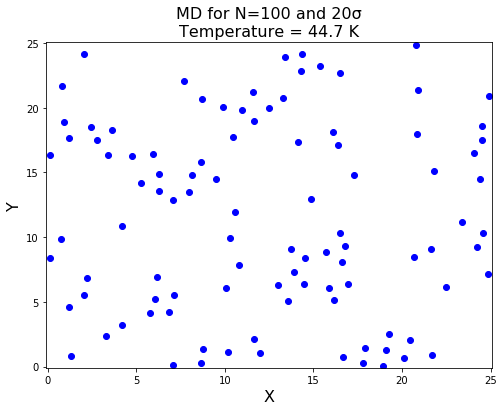

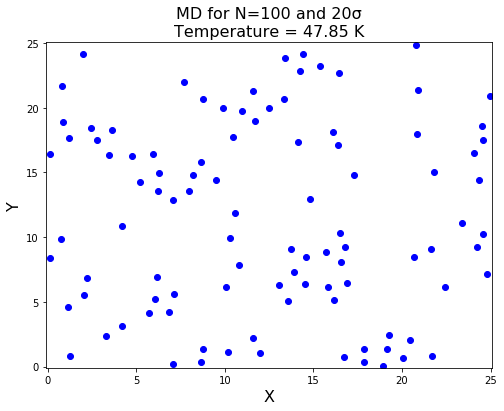

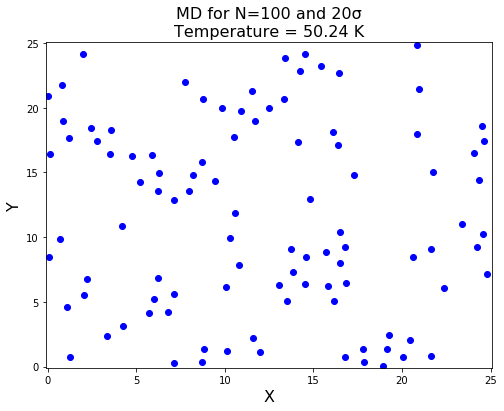

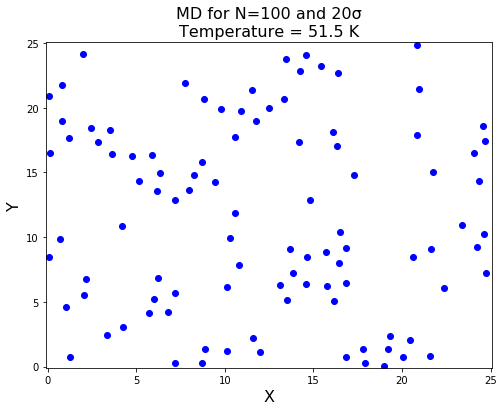

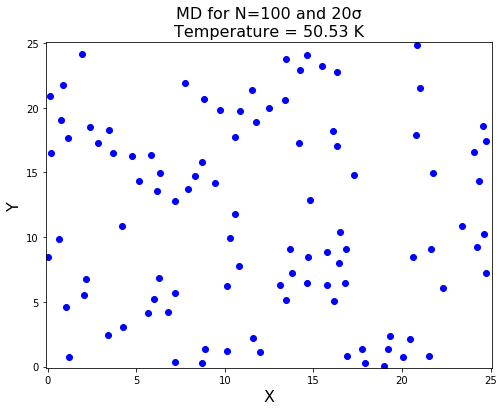

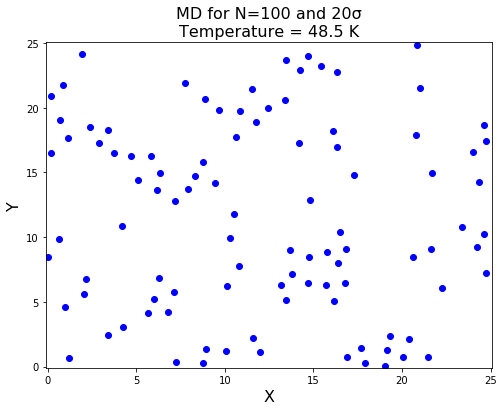

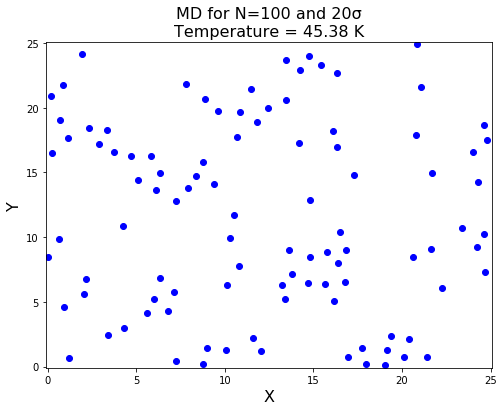

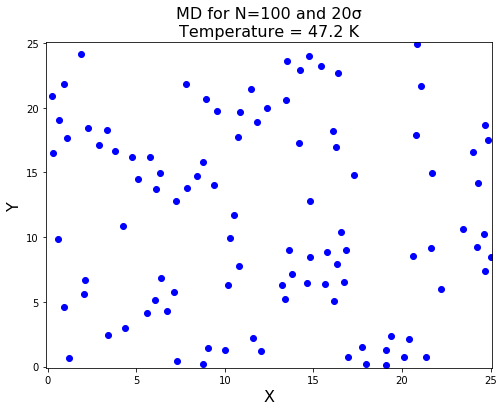

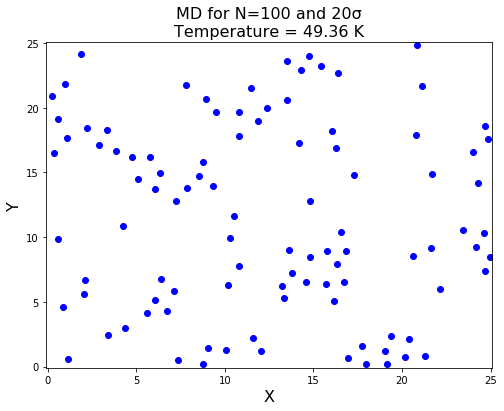

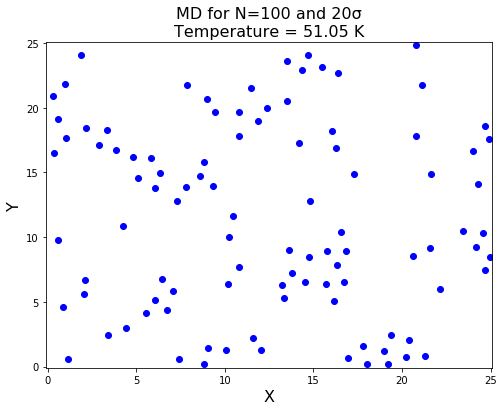

Error in callback <function flush_figures at 0x00000197AD56D2F0> (for post_execute):


KeyboardInterrupt: 

In [75]:
# For producing plot in order to make gif
plb.rcParams['figure.figsize'] = 8,6
for k in range(100):
    ActioN(dots,dt,C=8)
    plb.figure()
    plb.title('MD for N=100 and 20\u03c3\nTemperature = {} K'.format(round(Temperature(dots,N)*120,2)),fontsize=16)
    plb.scatter(dots[:,0],dots[:,1],label="Particles",color="b",marker="o")
    plb.xlim(-0.1,25.1)
    plb.ylim(-0.1,25.1)
    plb.xlabel("X",fontsize=16)
    plb.ylabel("Y",fontsize=16)
    plb.savefig('Desktop/PICSS/{}.png'.format(k))

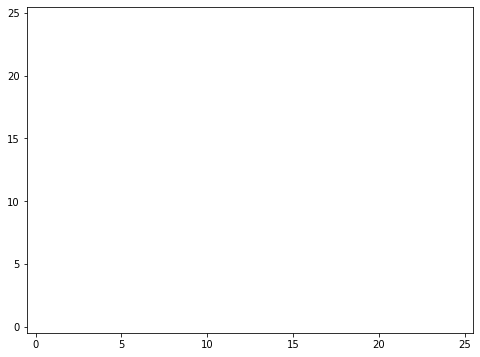

In [83]:
from IPython.display import HTML
HTML(ani.to_jshtml())

In [9]:
#All the functions we need for MD

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'"""
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


def V_CM(dots,N):
    Vx = np.mean(dots[:,2])
    Vy = np.mean(dots[:,3])
    return Vx,Vy

def CM_V_0(dots,N):
    Vx , Vy = V_CM(dots,N)
    dots[:,2] -= Vx
    dots[:,3] -= Vy
    
def New_Container(dots,N):
    
    """Returns new configuration for patricles:)"""
    
    Top = (dots[:,0]< __L__ - cutoff) & (dots[:,0] > cutoff) & (dots[:,1] >  __L__ - cutoff) & (dots[:,1] < __L__) 
    Bottom = (dots[:,0]< __L__ - cutoff) & (dots[:,0] > cutoff) & (dots[:,1] > 0) & (dots[:,1] < cutoff) 
    Left = (dots[:,0]< cutoff) & (dots[:,0] > 0) & (dots[:,1] > cutoff) & (dots[:,1] < __L__ - cutoff) 
    Right = (dots[:,0]< __L__) & (dots[:,0] > __L__ - cutoff) & (dots[:,1] > cutoff) & (dots[:,1] < __L__ - cutoff) 

    TR = (dots[:,0]< __L__) & (dots[:,0] >  __L__ - cutoff) & (dots[:,1] >  __L__ - cutoff) & (dots[:,1] < __L__) 
    TL = (dots[:,0]< cutoff) & (dots[:,0] >  0) & (dots[:,1] >  __L__ - cutoff) & (dots[:,1] < __L__) 
    BR = (dots[:,0]< __L__) & (dots[:,0] >  __L__ - cutoff) & (dots[:,1] > 0) & (dots[:,1] < cutoff) 
    BL = (dots[:,0]< cutoff) & (dots[:,0] > 0) & (dots[:,1] > 0) & (dots[:,1] < cutoff) 

    Num = np.count_nonzero(Top) +np.count_nonzero(Bottom)+np.count_nonzero(Left)+np.count_nonzero(Right)+np.count_nonzero(TR)+ np.count_nonzero(TL)+np.count_nonzero(BR)+np.count_nonzero(BL)

    DoTs = np.zeros((N,4),float)


    DoTs[0:N,:] = np.copy(dots)


    dots[BL,0:2] += __L__
    dots[TR,0:2] -= __L__

    dots[BR,0] -= __L__
    dots[BR,1] += __L__

    dots[TL,0] += __L__
    dots[TL,1] -= __L__

    dots[Bottom,1] += __L__
    dots[Top,1] -= __L__
    dots[Right,0] -= __L__
    dots[Left,0] += __L__


    DoTs = np.append(DoTs,dots[Top,:],axis=0)
    DoTs = np.append(DoTs,dots[Bottom,:],axis=0)
    DoTs = np.append(DoTs,dots[Left,:],axis=0)
    DoTs = np.append(DoTs,dots[Right,:],axis=0)

    DoTs = np.append(DoTs,dots[BL,:],axis=0)
    DoTs = np.append(DoTs,dots[TR,:],axis=0)
    DoTs = np.append(DoTs,dots[BR,:],axis=0)
    DoTs = np.append(DoTs,dots[TL,:],axis=0)
    
    dots = np.copy(DoTs[0:N,:])
    return DoTs


def Thermostat(dots,N,T0):
    T1 = Temperature(dots,N)
    dots[:,2:] *= np.sqrt(T0/T1)
    

def InterForces(dots,cutoff):
    #To fix the boundary condition we add some block of code
    #Copy dots before
    dots_cpy = np.copy(dots)
    new_dots = New_Container(dots_cpy,N)
    N_prim = len(new_dots)

    
    D = squareform(pdist(new_dots[:,0:2]))  
    ind1 , ind2 = np.where(D<cutoff)
    unq = ind1 < ind2
    ind1 = ind1[unq] 
    ind2 = ind2[unq]

    force_matrix_x = np.zeros((N_prim,N_prim))                
    force_matrix_y = np.zeros((N_prim,N_prim))             

    for i1,i2 in zip(ind1,ind2):
        
        r = (new_dots[i2,0]-new_dots[i1,0],new_dots[i2,1]-new_dots[i1,1])       
        

        theta_x = angle_between(r,(1,0))
        theta_y = angle_between(r,(0,1))
        
        force = L_J_F(D[i1,i2])


        force_matrix_x[i1,i2] += -force*np.cos(theta_x)
        force_matrix_y[i1,i2] += -force*np.cos(theta_y)

        force_matrix_x[i2,i1] += +force*np.cos(theta_x)
        force_matrix_y[i2,i1] += +force*np.cos(theta_y)


    F_X = np.sum (force_matrix_x,axis=1)
    F_Y = np.sum (force_matrix_y,axis=1)

    return F_X[0:N],F_Y[0:N]              



#Run the above code

def ActioN(dots,dt,C=1,termo = False,Final=None,step=1):
    """Runs system for a dt and C times, endowed with bernestein thermostat"""
    
    for i in range(C):
        
        global F_X_0
        global F_Y_0
        
        dots[:,0] += dots[:,2]*dt + 0.5*F_X_0*(dt**2)
        dots[:,1] += dots[:,3]*dt + 0.5*F_Y_0*(dt**2)
        
        
        dama =  Temperature(dots,N)
        if (termo and dama>Final):
            Thermostat(dots,N, dama - dama*step)
        elif (termo and dama<Final):
            Thermostat(dots,N, dama + dama*step)


        cross_left = dots[:,0]<0.
        cross_right = dots[:,0]>__L__
        cross_top = dots[:,1]>__L__
        cross_bot = dots[:,1]<0.

        
        dots[cross_left,0] += __L__
        dots[cross_right,0] -= __L__

        dots[cross_top,1] -= __L__
        dots[cross_bot,1] += __L__


        F_X_1 , F_Y_1 = InterForces(dots,cutoff)

        dots[:,2] += 0.5*(F_X_0+F_X_1)*(dt)
        dots[:,3] += 0.5*(F_Y_0+F_Y_1)*(dt)
        
        F_X_0 = F_X_1
        F_Y_0 = F_Y_1

def Temperature(dots,N):
    return np.sum(dots[:,2] * dots[:,2] + dots[:,3] * dots[:,3])/(2*N-2)

def Kinetic(dots,N):
    return 0.5 * np.sum(dots[:,2] * dots[:,2] + dots[:,3] * dots[:,3])

def Potential(dots,N):
    D = np.triu(squareform(pdist(dots[:,0:2])))
    D[D == 0] = 1.
    U = 4*np.sum(1/(D**12)-1/(D**6))
    return U

def Energy(dots,N):
    return Kinetic(dots,N) + Potential(dots,N)

def Lefts(dots,N):
    Lefts = dots[:,0] < __L__/2
    return np.count_nonzero(Lefts)/N


def Pressure(dots,N):

    D = squareform(pdist(dots[:,0:2]))
    ind1 , ind2 = np.where(D<cutoff)
    unq = ind1 < ind2
    ind1 = ind1[unq] 
    ind2 = ind2[unq]

    Ct = 0.
    
    for i1,i2 in zip(ind1,ind2):
        
        r = (dots[i2,0]-dots[i1,0],dots[i2,1]-dots[i1,1])

        theta_x = angle_between(r,(1,0))
        theta_y = angle_between(r,(0,1))
        
        force = L_J_F(D[i1,i2])
        
        force_vector = (-force*np.cos(theta_x) , -force*np.cos(theta_y))
        Ct += np.dot(r,force_vector)
        
    return 1/N*(2*Kinetic(dots,N) + Ct)

def variance(data):
    """Returns the std(standard deviation) of data"""
    data = np.array(data)
    return(np.mean(data**2) - np.mean(data)**2)


def AutoCorrelation(data,j):
    """Finds the Autocorrelation between samples (data) with distance j for compom=nentwise autocorrelation"""
    if not j:
        return 1
    
    data = np.array(data)
    A = 0
    B = 0
    for i in range(len(data)):
        if i+j < len(data):
            A += data[i]*data[i+j]
            B += data[i+j]

    A/= (len(data)-j)
    B/= (len(data)-j)
    return (A - np.mean(data[:-j])*B)/variance(data)

In [1107]:
#Storing the velocity datas

UpTo = 1000
VelocityArr = np.zeros((UpTo,N,2),float)
for k in range(UpTo):
    ActioN(dots,dt,C=1)
    VelocityArr[k] = dots[:,2:]

print(VelocityArr)

[[[ 3.1366006  -2.38406444]
  [ 0.763303    1.49247117]
  [-3.22794152 -1.17247748]
  ...
  [ 0.3573367   0.45129496]
  [ 0.33027019 -0.12476231]
  [ 2.49268954  0.04885991]]

 [[ 3.13575654 -2.38360819]
  [ 0.77152172  1.49754331]
  [-3.22630496 -1.16566276]
  ...
  [ 0.347699    0.45899136]
  [ 0.33009403 -0.12422046]
  [ 2.54684513  0.06533091]]

 [[ 3.13504796 -2.38309619]
  [ 0.77979033  1.5027421 ]
  [-3.22454188 -1.15897262]
  ...
  [ 0.33803248  0.46698779]
  [ 0.32931472 -0.12733476]
  [ 2.56030207  0.0704031 ]]

 ...

 [[-0.75209733  0.03634072]
  [ 0.98795815 -1.63055307]
  [-2.45708541  0.9816094 ]
  ...
  [-3.89465828  1.77017938]
  [-4.25164287  3.99831941]
  [-7.59345561  6.69333602]]

 [[-0.75208223  0.03570675]
  [ 0.98973358 -1.61599164]
  [-3.08577832  1.01858049]
  ...
  [-4.24734998  2.23850379]
  [-4.25026876  4.00059602]
  [-7.59581559  6.69412566]]

 [[-0.75207105  0.03507833]
  [ 0.99051083 -1.60247479]
  [-3.49897952  1.04117236]
  ...
  [-4.48430415  2.552810

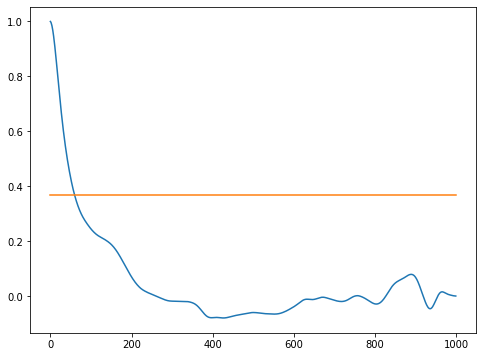

In [941]:
#Test for x component auto-correlation
"""
Data_X = np.zeros(UpTo,float)

for i in range(90):
    for j in range(UpTo):
        #print(j,"==>")
        Data_X[j] += (AutoCorrelation(VelocityArr[:,i,0],j))
"""
plb.plot(Data_X/90)
plb.plot([0,1000],[np.exp(-1)]*2)

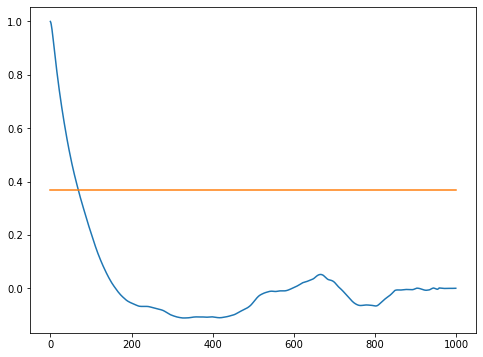

In [1108]:
#Test for y component auto-correlation

Data_Y = np.zeros(UpTo,float)

for i in range(90):
    for j in range(UpTo):
        #print(j,"==>")
        Data_Y[j] += (AutoCorrelation(VelocityArr[:,i,1],j))

plb.plot(Data_Y/90)
#plb.plot(Data_X/90)
plb.plot([0,1000],[np.exp(-1)]*2)

66.74838137785999

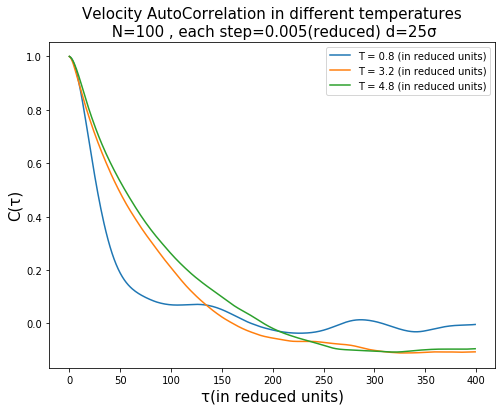

In [1122]:
#Test for norm of velocity auto-correlation
"""
Data_V = np.zeros(UpTo,float)

for i in range(80):
    Temp = np.linalg.norm(VelocityArr[:,i,:],axis=1)
    for j in range(UpTo):
        #print(j,"==>")
        Data_V[j] += (AutoCorrelation(Temp,j))
"""
DY120 = np.copy(Data_Y/90)
plb.plot(DY20[0:400],label="T = 0.8 (in reduced units)")
plb.plot(DY120[0:400],label="T = 3.2 (in reduced units)")
plb.plot(DY80[0:400],label="T = 4.8 (in reduced units)")
plb.legend()
plb.title('Velocity AutoCorrelation in different temperatures\n N=100 , each step=0.005(reduced) d=25\u03c3',fontsize=15)
plb.xlabel('\u03c4(in reduced units)',fontsize=15)
plb.ylabel('C(\u03c4)',fontsize=15)

"""plb.plot(Data_V/80,label="AutoCorrelation of |v|")
plb.plot(Data_X/90,label="AutoCorrelation of x component")
plb.plot(Data_Y/90,label="AutoCorrelation of y component")
plb.plot([0,1000],[np.exp(-1)]*2,label="y=1/e")
plb.legend()
plb.title('AutoCorrelation of Velosities\n N=100 , each step=0.005(reduced) d=25\u03c3',fontsize=15)
plb.xlabel('\u03c4(in reduced units)',fontsize=15)
plb.ylabel('C(\u03c4)',fontsize=15)
"""
XxX = np.log(DY60[0:150])
p = np.polyfit(range(0,150),XxX,1)
-1/p[0]

In [78]:
print(Temperature(dots,N))
print(V_CM(dots,N))

1.1857198851440633
(0.017306853829250426, -0.0075283773811573316)


In [59]:
t11 = time.time()
ActioN(dots,dt,C=50,termo=1,Final=1.2,step=0.001)  #,termo=1,Final=0.5,step=0.05
time.time() - t11

4.036678314208984

'plb.plot(dots[:,0],dots[:,1],linestyle="--")\nplb.legend()'

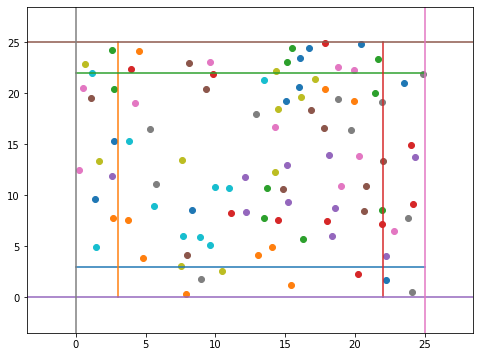

In [61]:
#ActioN(dots,0.1)


for i in range(N):
    plb.scatter(dots[i,0],dots[i,1],label="{}".format(i))

"""plb.scatter(dots[:,0],dots[:,1],)

plb.xlim(-0.5,__L__)
plb.ylim(-0.5,__L__)


plb.title('Configuration of particles in t=0 on the box\ndimension is 25\u03c3 and each particle has a \nseparation \u03c3 from neighbours',fontsize=15)
plb.xlabel('x (reduced units)',fontsize=15)
plb.ylabel('y (reduced units)',fontsize=15)"""

plb.xlim(-(cutoff + 0.5),__L__ + cutoff + 0.5)
plb.ylim(-(cutoff + 0.5),__L__+ cutoff + 0.5)
plb.plot(np.linspace(0,__L__,20),[3]*20)
plb.plot([3]*20,np.linspace(0,__L__,20))

plb.plot(np.linspace(0,__L__,20),[__L__ - 3]*20)
plb.plot([__L__ - 3]*20,np.linspace(0,__L__,20))


plb.plot(np.linspace(-3.5,__L__+3.5,20),[0]*20)
plb.plot(np.linspace(-3.5,__L__+3.5,20),[__L__]*20)
plb.plot([__L__ ]*20,np.linspace(-3.5,__L__+3.5,20))
plb.plot([0]*20,np.linspace(-3.5,__L__+3.5,20))

"""plb.plot(dots[:,0],dots[:,1],linestyle="--")
plb.legend()"""


In [62]:
#Not importatnt, just for collecting data ... U can Ignore it
DDDx = np.copy(dots)

In [81]:
#Not importatnt, just for collecting data ... U can Ignore it
dots = np.copy(DDDx)

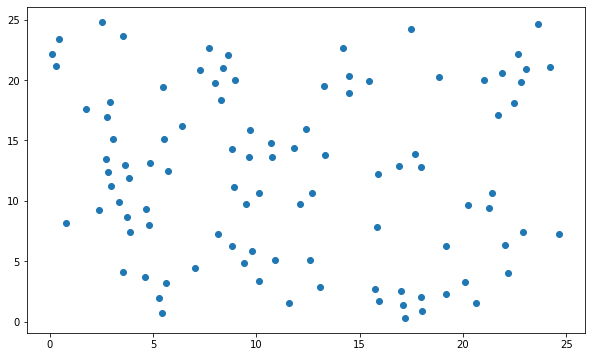

In [1413]:
#Not importatnt, just for collecting data ... U can Ignore it
plb.scatter(dots[:,0],dots[:,1])

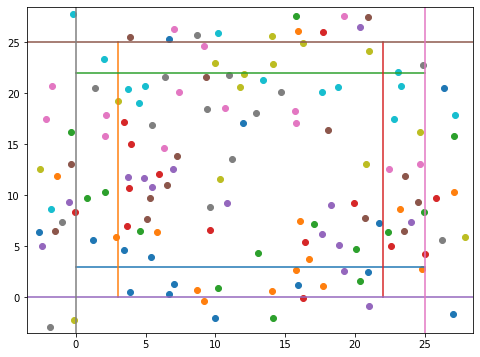

In [720]:
#Not importatnt, A test for understanding whether the Periodic B.C works or not?  Fortunately it works ... U can Ignore it
for i in range(len(DoTs)):
    plb.scatter(DoTs[i,0],DoTs[i,1],label="{}".format(i))
plb.xlim(-(cutoff + 0.5),__L__ + cutoff + 0.5)
plb.ylim(-(cutoff + 0.5),__L__+ cutoff + 0.5)
plb.plot(np.linspace(0,__L__,20),[3]*20)
plb.plot([3]*20,np.linspace(0,__L__,20))

plb.plot(np.linspace(0,__L__,20),[__L__ - 3]*20)
plb.plot([__L__ - 3]*20,np.linspace(0,__L__,20))


plb.plot(np.linspace(-3.5,__L__+3.5,20),[0]*20)
plb.plot(np.linspace(-3.5,__L__+3.5,20),[__L__]*20)
plb.plot([__L__ ]*20,np.linspace(-3.5,__L__+3.5,20))
plb.plot([0]*20,np.linspace(-3.5,__L__+3.5,20))

In [1363]:
#Here we plot the Results
"""_kin = []
_pot = []
_temp = []
_ene = []
_lef =  []
_pres = []"""
t11 = time.time()
for j in range(1000):
    ActioN(dots,0.005,termo=True,Final=0.01,step=0.005)
    _temp.append(Temperature(dots,N))
    #_pot.append(Potential(dots,N))
    #_kin.append(Kinetic(dots,N))
    #_ene.append(Energy(dots,N))
    #_lef.append(Lefts(dots,N))
    _pres.append(Pressure(dots,N))
print(time.time() - t11)

215.3094403743744


"\n\nplb.title('Ratio of particles that are in left side of box versus time\n N=100 , each step=0.005(reduced) d=25σ',fontsize=15)\nplb.xlabel('Timesteps(each steps lasts 0.005 in reduced units)',fontsize=15)\nplb.ylabel('Ration of particles in left side of box',fontsize=15)\n\nplb.legend()\nplb.title('Energy per particle versus Time with 0.005 timesteps\n100 patricles and dimension 25σ',fontsize=15)\nplb.xlabel('Timesteps(each steps lasts 0.005 in reduced units)',fontsize=15)\nplb.ylabel('Energy in ε units',fontsize=15)"

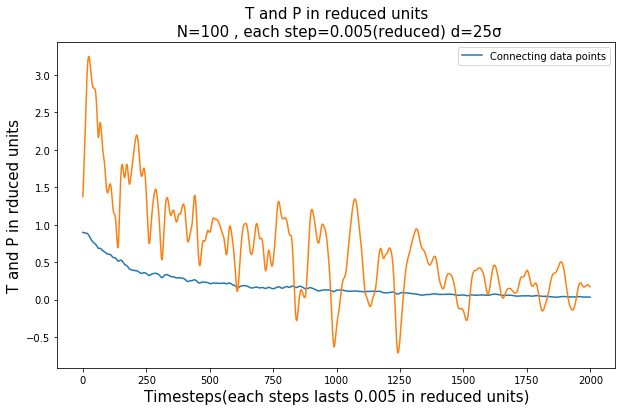

In [1412]:
plb.rcParams['figure.figsize'] = 10,6
plb.plot(np.array(_temp),label="Connecting data points")
#plb.plot(np.linspace(0,500,2),[0.7,.7],linestyle="--")
#plb.plot(np.array(_pot[0:6000])/100,label="Potential Energy Graph")
#plb.plot(np.array(_kin[0:6000])/100,label="Kinetic Energy Graph")
#plb.plot(np.array(_ene[0:6000])/100,label="Total Energy Graph")
#plb.plot(_lef[0:1000],label="Connecting data points")
#plb.plot(np.linspace(0,22000,2),[0.5,0.5])
plb.plot(np.array(_pres))
#plb.plot(np.linspace(0,6000,2),[1.2,1.2],linestyle="--")
plb.legend()
"""
plb.title('Pressure in reduced units\n N=100 , each step=0.005(reduced) d=25\u03c3',fontsize=15)
plb.xlabel('Timesteps(each steps lasts 0.005 in reduced units)',fontsize=15)
plb.ylabel('Pressure',fontsize=15)
"""
plb.title('T and P in reduced units\n N=100 , each step=0.005(reduced) d=25\u03c3',fontsize=15)
plb.xlabel('Timesteps(each steps lasts 0.005 in reduced units)',fontsize=15)
plb.ylabel('T and P in rduced units',fontsize=15)
"""

plb.title('Ratio of particles that are in left side of box versus time\n N=100 , each step=0.005(reduced) d=25\u03c3',fontsize=15)
plb.xlabel('Timesteps(each steps lasts 0.005 in reduced units)',fontsize=15)
plb.ylabel('Ration of particles in left side of box',fontsize=15)

plb.legend()
plb.title('Energy per particle versus Time with 0.005 timesteps\n100 patricles and dimension 25\u03c3',fontsize=15)
plb.xlabel('Timesteps(each steps lasts 0.005 in reduced units)',fontsize=15)
plb.ylabel('Energy in \u03b5 units',fontsize=15)"""

heading
===========
it wa ***m*** $sda